In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [189]:
df = pd.read_csv("players.csv")
df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Penalties scored,...,Successful 50/50s,Assists,Passes,Big chances created,Crosses,Yellow cards,Red cards,Fouls,Offsides,Goals
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,NaN,...,NaN,0,1783,NaN,NaN,2,0,0,NaN,0
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,NaN,...,NaN,0,0,NaN,NaN,0,0,0,NaN,0
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,NaN,...,NaN,0,0,NaN,NaN,0,0,0,NaN,0
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,NaN,...,196.0,18,7125,28.0,389.0,23,0,125,8.0,7
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,NaN,...,12.0,1,519,1.0,45.0,2,0,9,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,0.0,...,NaN,4,399,5.0,52.0,3,0,16,5.0,3
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,6.0,...,NaN,13,2108,26.0,57.0,7,0,81,52.0,32
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,0.0,...,NaN,12,1434,13.0,327.0,4,0,80,13.0,5
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0.0,...,NaN,0,1,0.0,0.0,0,0,0,0.0,0


In [190]:
#df = df.fillna(df.mode())
#df['Penalties scored'] = df['Penalties scored'].fillna(df['Penalties scored'].mode()[0], inplace=True)
for column in df.columns:
    mode_value = df[column].mode()[0]  # Calculate mode for the column
    df[column].fillna(mode_value, inplace=True)

In [191]:
df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Penalties scored,...,Successful 50/50s,Assists,Passes,Big chances created,Crosses,Yellow cards,Red cards,Fouls,Offsides,Goals
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0.0,...,0.0,0,1783,0.0,0.0,2,0,0,0.0,0
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,0.0,0
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,0.0,0
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,0.0,...,196.0,18,7125,28.0,389.0,23,0,125,8.0,7
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,0.0,...,12.0,1,519,1.0,45.0,2,0,9,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,0.0,...,0.0,4,399,5.0,52.0,3,0,16,5.0,3
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,6.0,...,0.0,13,2108,26.0,57.0,7,0,81,52.0,32
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,0.0,...,0.0,12,1434,13.0,327.0,4,0,80,13.0,5
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0.0,...,0.0,0,1,0.0,0.0,0,0,0,0.0,0


Create HeatMap (to understand correlation between columns):

In [192]:
string_columns = df.iloc[:, :-1].select_dtypes(include=['object']).columns.tolist()
string_columns 

['Name', 'Club', 'Position', 'Nationality', 'Shooting accuracy %']

((Dropping unnecesary columns:))

In [193]:
drop = ['Name', 'Nationality']
df = df.drop(drop, axis=1)
df

,Jersey Number,Club,Position,Age,Appearances,Wins,Losses,Penalties scored,Freekicks scored,Shots,...,Successful 50/50s,Assists,Passes,Big chances created,Crosses,Yellow cards,Red cards,Fouls,Offsides,Goals
0,1.0,Arsenal,Goalkeeper,28.0,64,28,16,0.0,0.0,0.0,...,0.0,0,1783,0.0,0.0,2,0,0,0.0,0
1,33.0,Arsenal,Goalkeeper,26.0,0,0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,0.0,0
2,13.0,Arsenal,Goalkeeper,25.0,0,0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,0.0,0
3,2.0,Arsenal,Defender,25.0,160,90,37,0.0,0.0,0.0,...,196.0,18,7125,28.0,389.0,23,0,125,8.0,7
4,3.0,Arsenal,Defender,23.0,16,7,5,0.0,0.0,0.0,...,12.0,1,519,1.0,45.0,2,0,9,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,7.0,Wolverhampton-Wanderers,Forward,20.0,31,14,7,0.0,0.0,19.0,...,0.0,4,399,5.0,52.0,3,0,16,5.0,3
567,9.0,Wolverhampton-Wanderers,Forward,29.0,78,32,23,6.0,0.0,237.0,...,0.0,13,2108,26.0,57.0,7,0,81,52.0,32
568,37.0,Wolverhampton-Wanderers,Forward,24.0,105,27,47,0.0,0.0,78.0,...,0.0,12,1434,13.0,327.0,4,0,80,13.0,5
569,17.0,Wolverhampton-Wanderers,Forward,18.0,1,0,1,0.0,0.0,0.0,...,0.0,0,1,0.0,0.0,0,0,0,0.0,0


((To create heatmap, require numerical values::therefore, converting string values to int by encoding:))

In [194]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

string_columns = df.iloc[:, :-1].select_dtypes(include=['object']).columns.tolist()
print(string_columns) 

lecols = ['Club', 'Position'] #Columns that have to encoded using Label Encoder
label_encoders = {}

for i in lecols:
    # Initialize LabelEncoder for each column
    label_encoders[i] = LabelEncoder()
    
    # Fit LabelEncoder on the unique values of the column and transform the column
    df[i] = label_encoders[i].fit_transform(df[i])
    print(label_encoders[i].classes_)

df['Shooting accuracy %'] = df[string_columns[-1]].str.rstrip('%').astype(float)
df = df.fillna(df.mode())
df



['Club', 'Position', 'Shooting accuracy %']
['Arsenal' 'Aston-Villa' 'Brighton-and-Hove-Albion' 'Burnley' 'Chelsea'
 'Crystal-Palace' 'Everton' 'Fulham' 'Leeds-United' 'Leicester-City'
 'Liverpool' 'Manchester-City' 'Manchester-United' 'Newcastle-United'
 'Sheffield-United' 'Southampton' 'Tottenham-Hotspur'
 'West-Bromwich-Albion' 'West-Ham-United' 'Wolverhampton-Wanderers']
['Defender' 'Forward' 'Goalkeeper' 'Midfielder']


,Jersey Number,Club,Position,Age,Appearances,Wins,Losses,Penalties scored,Freekicks scored,Shots,...,Successful 50/50s,Assists,Passes,Big chances created,Crosses,Yellow cards,Red cards,Fouls,Offsides,Goals
0,1.0,0,2,28.0,64,28,16,0.0,0.0,0.0,...,0.0,0,1783,0.0,0.0,2,0,0,0.0,0
1,33.0,0,2,26.0,0,0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,0.0,0
2,13.0,0,2,25.0,0,0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,0.0,0
3,2.0,0,0,25.0,160,90,37,0.0,0.0,0.0,...,196.0,18,7125,28.0,389.0,23,0,125,8.0,7
4,3.0,0,0,23.0,16,7,5,0.0,0.0,0.0,...,12.0,1,519,1.0,45.0,2,0,9,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,7.0,19,1,20.0,31,14,7,0.0,0.0,19.0,...,0.0,4,399,5.0,52.0,3,0,16,5.0,3
567,9.0,19,1,29.0,78,32,23,6.0,0.0,237.0,...,0.0,13,2108,26.0,57.0,7,0,81,52.0,32
568,37.0,19,1,24.0,105,27,47,0.0,0.0,78.0,...,0.0,12,1434,13.0,327.0,4,0,80,13.0,5
569,17.0,19,1,18.0,1,0,1,0.0,0.0,0.0,...,0.0,0,1,0.0,0.0,0,0,0,0.0,0


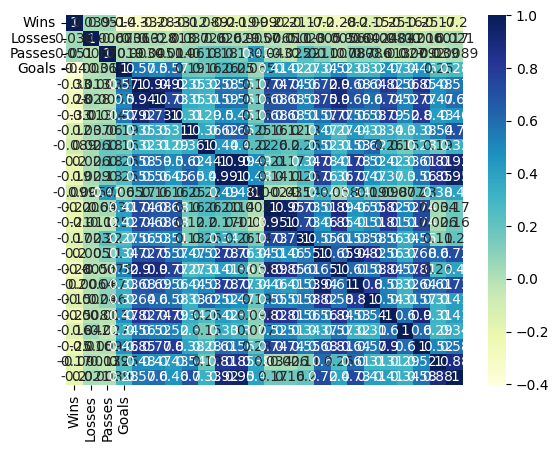

In [195]:
selected_data = df
cormat = np.corrcoef(selected_data, rowvar=False)
sns.heatmap(cormat, annot=True, cmap='YlGnBu', xticklabels=df, yticklabels=df)
plt.show()

In [196]:
X = df.iloc[:,3:-1] #independent variables
X=X.drop("Nationality", axis=1)
X

KeyError: "['Nationality'] not found in axis"

In [ ]:
y = df.iloc[:, -1] #dependent variable
y


0       0
1       0
2       0
3       7
4       1
       ..
566     3
567    32
568     5
569     0
570     0
Name: Goals, Length: 571, dtype: int64

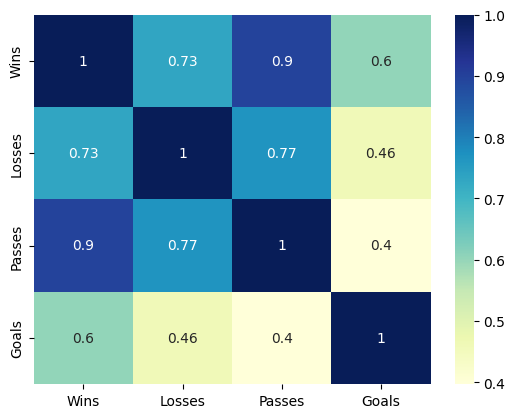

In [ ]:
selected_columns = ['Wins', 'Losses', 'Passes', 'Goals']
selected_data = df[selected_columns]
cormat = np.corrcoef(selected_data, rowvar=False)
sns.heatmap(cormat, annot=True, cmap='YlGnBu', xticklabels=selected_columns, yticklabels=selected_columns)
plt.show()

Implementing Encoding:

In [ ]:
X[:, 10] = X[:, 10].astype(str)
X[:, 10] = np.array([float(value.rstrip('%')) for value in X[:, 10]])
X[:, 10]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       45.0, 26.0, 29.0, 11.0, 28.0, 33.0, 0.0, 28.0, 27.0, 21.0, 46.0,
       47.0, 35.0, 31.0, 40.0, 42.0, 37.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 32.0, 35.0, 3.0, 30.0,
       14.0, 33.0, 33.0, 38.0, 17.0, 0.0, 51.0, 29.0, 3.0, 35.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0,
       20.0, 14.0, 39.0, 35.0, 28.0, 19.0, 27.0, 0.0, 0.0, 0.0, 0.0, 31.0,
       41.0, 24.0, 28.0, 37.0, 45.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 31.0, 32.0, 8.0, 27.0, 27.0,
       25.0, 0.0, 47.0, 38.0, 37.0, 54.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 39.0, 24.0, 29.0, 24.0,
       18.0, 36.0, 41.0, 1.0, 0.0, 17.0, 42.0, 39.0, 28.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.0,
       21.0, 32.0, 31.0, 0.0, 30.0, 26.0, 4.0, 0.0, 0.0,

In [ ]:
X[:, 10]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       45.0, 26.0, 29.0, 11.0, 28.0, 33.0, 0.0, 28.0, 27.0, 21.0, 46.0,
       47.0, 35.0, 31.0, 40.0, 42.0, 37.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 32.0, 35.0, 3.0, 30.0,
       14.0, 33.0, 33.0, 38.0, 17.0, 0.0, 51.0, 29.0, 3.0, 35.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0,
       20.0, 14.0, 39.0, 35.0, 28.0, 19.0, 27.0, 0.0, 0.0, 0.0, 0.0, 31.0,
       41.0, 24.0, 28.0, 37.0, 45.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 31.0, 32.0, 8.0, 27.0, 27.0,
       25.0, 0.0, 47.0, 38.0, 37.0, 54.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 39.0, 24.0, 29.0, 24.0,
       18.0, 36.0, 41.0, 1.0, 0.0, 17.0, 42.0, 39.0, 28.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.0,
       21.0, 32.0, 31.0, 0.0, 30.0, 26.0, 4.0, 0.0, 0.0,

Printing our training and testing sets:

In [ ]:
trainsetx=pd.DataFrame(X_train)
trainsetx

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,3,17,24.0,132,53,50,0.0,0.0,138.0,47.0,...,311.0,138.0,9,1920,13.0,263.0,7,0,36,12.0
1,0,17,20.0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0
2,2,17,34.0,5,2,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0,111,0.0,0.0,1,0,0,0.0
3,0,2,32.0,136,94,22,0.0,0.0,0.0,0.0,...,766.0,32.0,1,9366,3.0,7.0,31,0,118,1.0
4,1,18,33.0,238,133,56,2.0,0.0,548.0,212.0,...,0.0,0.0,28,4718,40.0,90.0,18,2,223,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,3,5,26.0,29,13,11,0.0,0.0,21.0,5.0,...,72.0,15.0,3,604,4.0,25.0,2,0,20,1.0
452,0,17,25.0,139,47,57,0.0,0.0,0.0,0.0,...,703.0,93.0,3,5935,9.0,210.0,28,1,137,2.0
453,0,33,22.0,49,17,23,0.0,0.0,0.0,0.0,...,151.0,24.0,1,1316,2.0,40.0,8,0,36,2.0
454,3,18,27.0,131,40,65,0.0,0.0,182.0,54.0,...,576.0,129.0,11,6811,15.0,71.0,31,0,145,10.0


In [ ]:
trainsety=pd.DataFrame(y_train)
trainsety

,0
0,10
1,0
2,0
3,8
4,86
...,...
451,2
452,6
453,0
454,17


In [ ]:
#XY = np.hstack((X_train, y_train))
#print(np.concatenate((X_train.reshape(len(X_train),1), y_train.reshape(len(y_train),1)),1))
trainsetx=pd.concat([trainsetx, trainsety], axis=1)
trainsetx

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,0
0,3,17,24.0,132,53,50,0.0,0.0,138.0,47.0,...,138.0,9,1920,13.0,263.0,7,0,36,12.0,10
1,0,17,20.0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,0.0,0
2,2,17,34.0,5,2,3,0.0,0.0,0.0,0.0,...,0.0,0,111,0.0,0.0,1,0,0,0.0,0
3,0,2,32.0,136,94,22,0.0,0.0,0.0,0.0,...,32.0,1,9366,3.0,7.0,31,0,118,1.0,8
4,1,18,33.0,238,133,56,2.0,0.0,548.0,212.0,...,0.0,28,4718,40.0,90.0,18,2,223,120.0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,3,5,26.0,29,13,11,0.0,0.0,21.0,5.0,...,15.0,3,604,4.0,25.0,2,0,20,1.0,2
452,0,17,25.0,139,47,57,0.0,0.0,0.0,0.0,...,93.0,3,5935,9.0,210.0,28,1,137,2.0,6
453,0,33,22.0,49,17,23,0.0,0.0,0.0,0.0,...,24.0,1,1316,2.0,40.0,8,0,36,2.0,0
454,3,18,27.0,131,40,65,0.0,0.0,182.0,54.0,...,129.0,11,6811,15.0,71.0,31,0,145,10.0,17


Actually fitting the model:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
print(len(X_train), len(y_train))

456 456


ValueError: x and y must be the same size

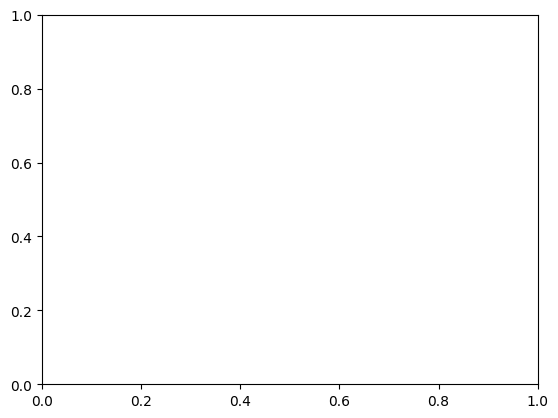

In [ ]:
X_train_flat = X_train.flatten()
y_train_flat = y_train.flatten()

# Plot the scatter plot
plt.scatter(X_train_flat, y_train_flat, color='red')
plt.show()

In [ ]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.show()